#Catalogue


*   Introduction data
*   Data preprocessing
*   3D scatter plot
*   Treemap create by tableau

# Introduction data

*n_participant:*Participant number

*diet_group:*Type of Diet

*sex:*Gender

*age_group:*Age Group

Mean GHG emissions (GreenHouse Gas) measured in kg

Mean *Agricultural* Land Use in square meters

Mean *Water* Scarcity

Mean *Eutrophication* Potential– measured in g of PO4e, gPO4e

Mean *GHG from CH4 emissions* (Methane) from livestock management measured in kg

Mean *GHG from N2O* (Nitrous Oxide) emissions associated with fertilizer use

Mean *Biodiversity* Impact–species extinction per day

Mean *Agricultural* Water Usage in cubic meters (1 m3 - 1,000 liters)

Mean *Acidification Potential*

sd_XX represents the standard deviation of each indicator

In [ ]:
import pandas as pd
from scipy.interpolate import make_interp_spline
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
data = pd.read_csv('Results_21Mar2022.csv')
# data = pd.read_csv('Results_21MAR2022_nokcaladjust.csv')

#data preprocessing


The data were normalised and weights were defined. The weights were found to be the best way to express the impact of the environment through online research on environmental data and through several experimental simulations.

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
# Defining weights
weights = {
    'mean_ghgs': 0.20,
    'mean_land': 0.20,
    'mean_watscar': 0.15,
    'mean_eut': 0.15,
    'mean_ghgs_ch4': 0.05,
    'mean_ghgs_n2o': 0.05,
    'mean_bio': 0.15,
    'mean_watuse': 0.05,
    'mean_acid': 0.10
}

features = list(weights.keys())

# Initializing the normalizer
scaler = MinMaxScaler()

# Standardize features and add new columns prefixed with 'normalizer_'
for feature in features:
    normalized_feature = f'normalizer_{feature}'
    data[normalized_feature] = scaler.fit_transform(data[[feature]])

# Calculation of the environmental impact index using the new normalized columns
data['environmental_impact_level'] = data.apply(
    lambda row: sum(row[f'normalizer_{feature}'] * weight for feature, weight in weights.items()),
    axis=1
)


An initial exploration of the raw data was conducted to look at the relationship of different diet groups with respect to the nine columns of environmental indicators

<ipython-input-17-1554e684a120>:24: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.


<ipython-input-17-1554e684a120>:24: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.


<ipython-input-17-1554e684a120>:24: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.


<ipython-input-17-1554e684a120>:24: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.


<ipython-input-17-1554e684a120>:24: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and wi

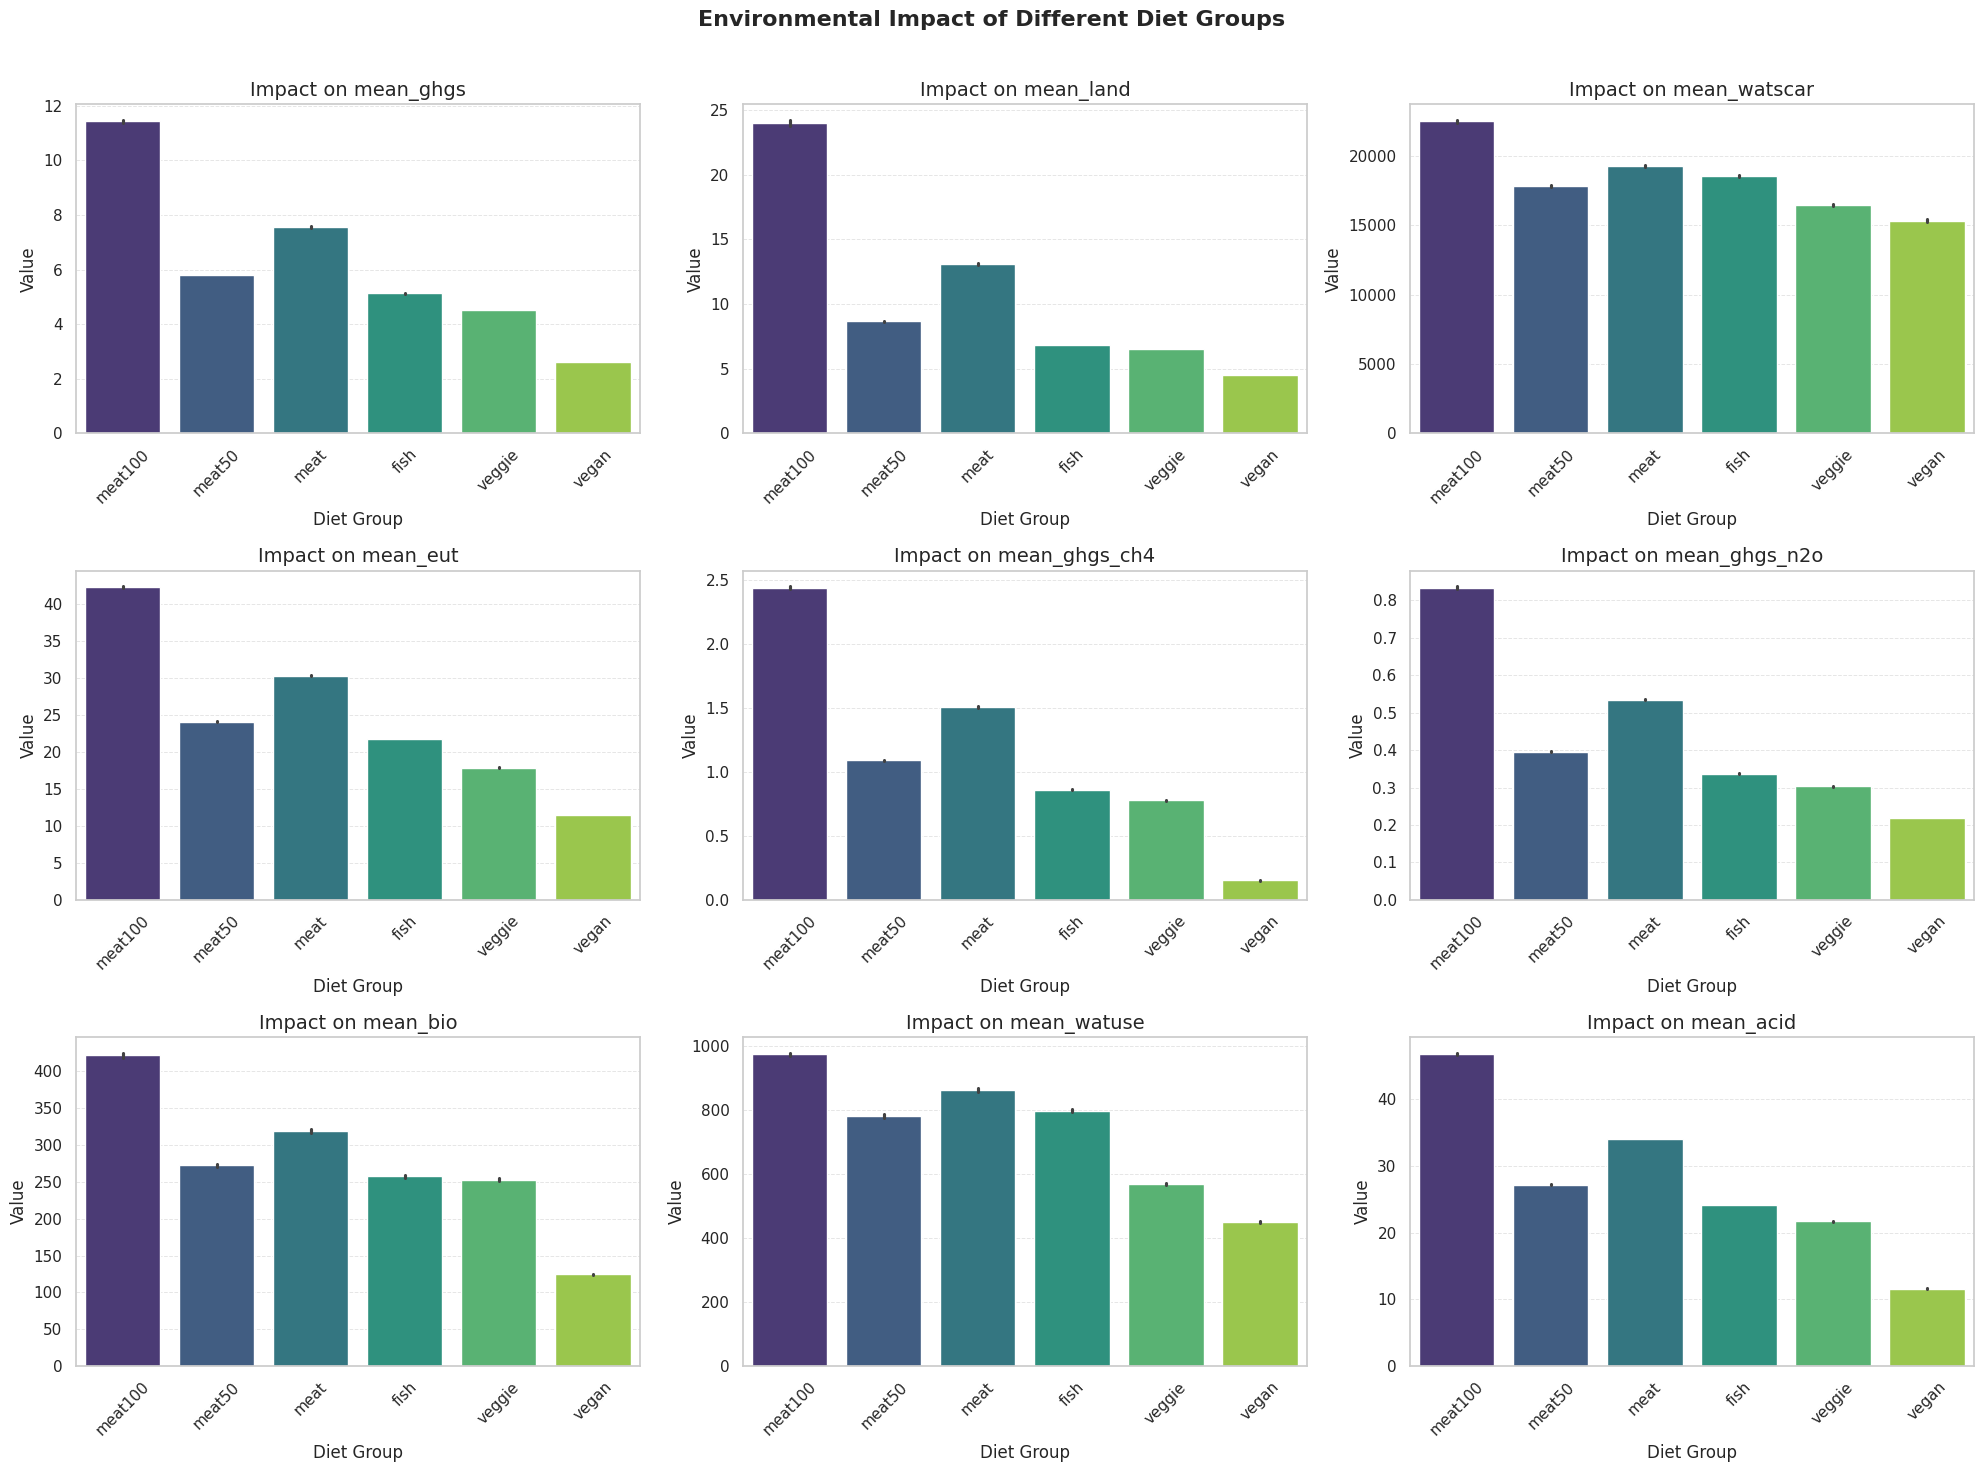

In [ ]:

features = [
    'mean_ghgs',
    'mean_land',
    'mean_watscar',
    'mean_eut',
    'mean_ghgs_ch4',
    'mean_ghgs_n2o',
    'mean_bio',
    'mean_watuse',
    'mean_acid'
]



fig, axes = plt.subplots(3, 3, figsize=(20, 15))
axes = axes.flatten()

custom_order = ['meat100', 'meat50', 'meat', 'fish', 'veggie', 'vegan']

palette = sns.color_palette("viridis", len(custom_order))

for i, feature in enumerate(features):
    ax = axes[i]
    sns.barplot(x='diet_group', y=feature, data=data, ax=ax, order=custom_order, palette=palette)
    ax.set_title(f'Impact on {feature}', fontsize=14)
    ax.set_xlabel('Diet Group', fontsize=12)
    ax.set_ylabel('Value', fontsize=12)
    ax.tick_params(axis='x', rotation=45)
    ax.grid(axis='y', linestyle='--', linewidth=0.7, alpha=0.5)

plt.suptitle('Environmental Impact of Different Diet Groups', fontsize=16, fontweight='bold')
plt.tight_layout(rect=[0, 0, 1, 0.97])
plt.show()

The SEM is calculated from the number of participants (n_participants) and the nine columns starting with sd_

In [ ]:
import math

sd_columns = [
    'sd_ghgs', 'sd_land', 'sd_watscar', 'sd_eut', 'sd_ghgs_ch4',
    'sd_ghgs_n2o', 'sd_bio', 'sd_watuse', 'sd_acid'
]

# Column for the number of participants
n_participants = 'n_participants'

# Compute SEM for each standard deviation column
sem_columns = []
for sd_col in sd_columns:
    sem_col = f'sem_{sd_col[3:]}'
    data[sem_col] = data.apply(lambda row: row[sd_col] / math.sqrt(row[n_participants]) if row[n_participants] > 0 else None, axis=1)
    sem_columns.append(sem_col)

The SEM values of the 9 columns calculated were summed up according to the diet group to observe the availability of each index

<ipython-input-19-83d6669a6be6>:17: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.


<ipython-input-19-83d6669a6be6>:17: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.


<ipython-input-19-83d6669a6be6>:17: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.


<ipython-input-19-83d6669a6be6>:17: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.


<ipython-input-19-83d6669a6be6>:17: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and wi

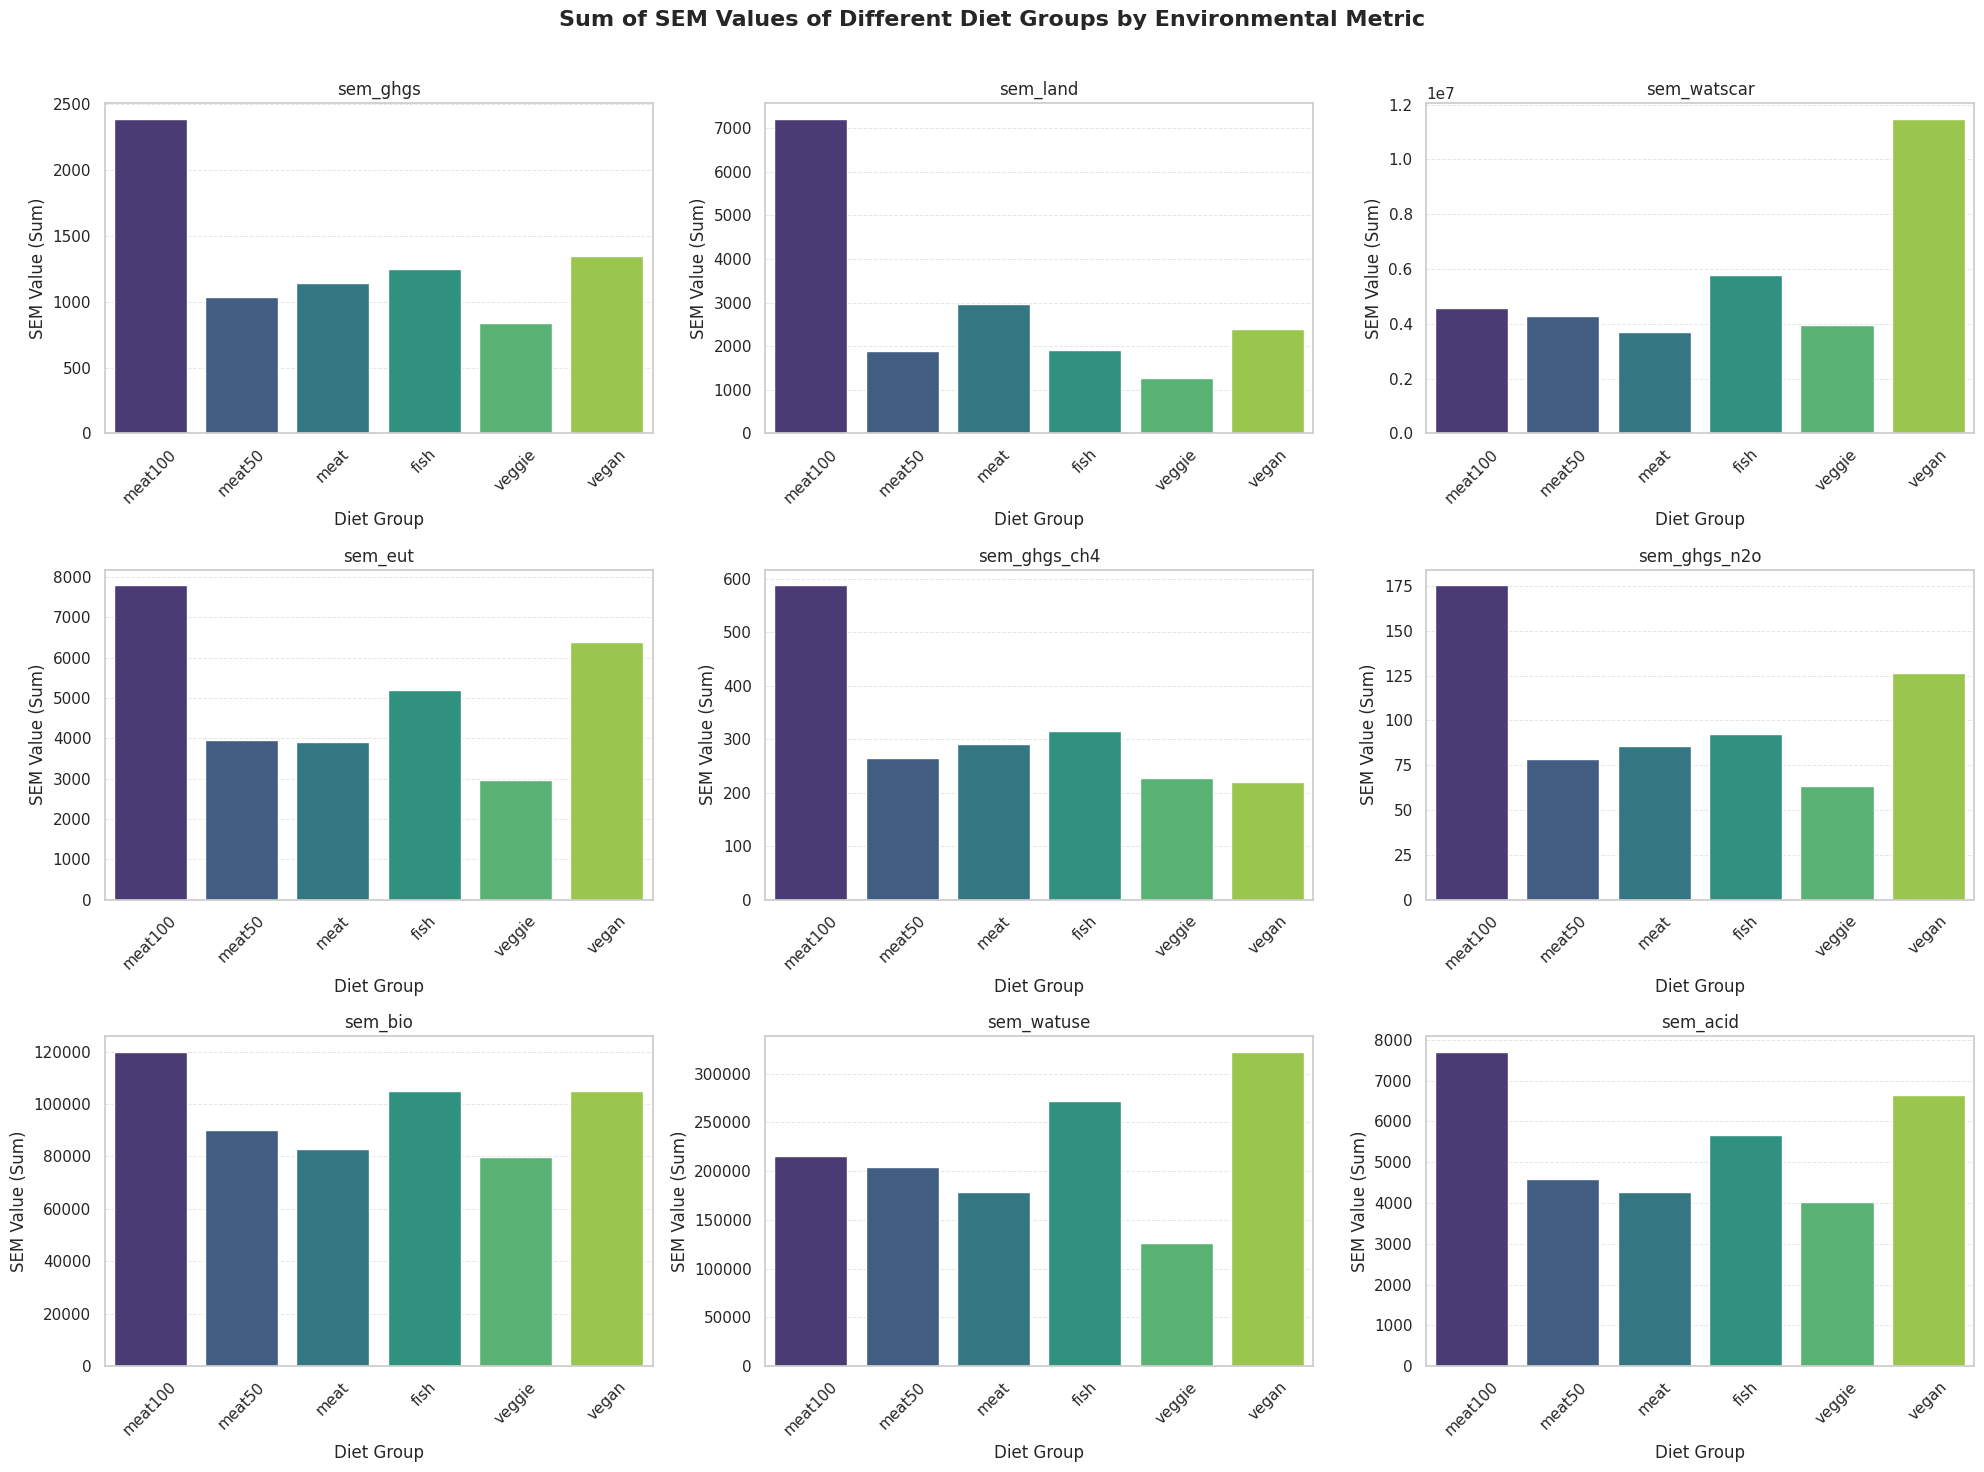

In [ ]:
# Group by diet group and calculate the sum of each SEM column
grouped_data = data.groupby('diet_group')[sem_columns].sum().reset_index()


fig, axes = plt.subplots(3, 3, figsize=(20, 15))
axes = axes.flatten()

custom_order = ['meat100', 'meat50', 'meat', 'fish', 'veggie', 'vegan']


palette = sns.color_palette("viridis", len(custom_order))


for i, sem_col in enumerate(sem_columns):
    ax = axes[i]
    sns.barplot(x='diet_group', y=sem_col, data=grouped_data, ax=ax, order=custom_order, palette=palette)
    ax.set_title(f'{sem_col}')
    ax.set_xlabel('Diet Group', fontsize=12)
    ax.set_ylabel('SEM Value (Sum)', fontsize=12)
    ax.tick_params(axis='x', rotation=45)
    ax.grid(axis='y', linestyle='--', linewidth=0.7, alpha=0.5)


plt.suptitle('Sum of SEM Values of Different Diet Groups by Environmental Metric', fontsize=16, fontweight='bold')
plt.tight_layout(rect=[0, 0, 1, 0.97])
plt.show()

Data visualisation of the environmental impacts of six diets based on standardised data.The median is used for the value axis of each plot

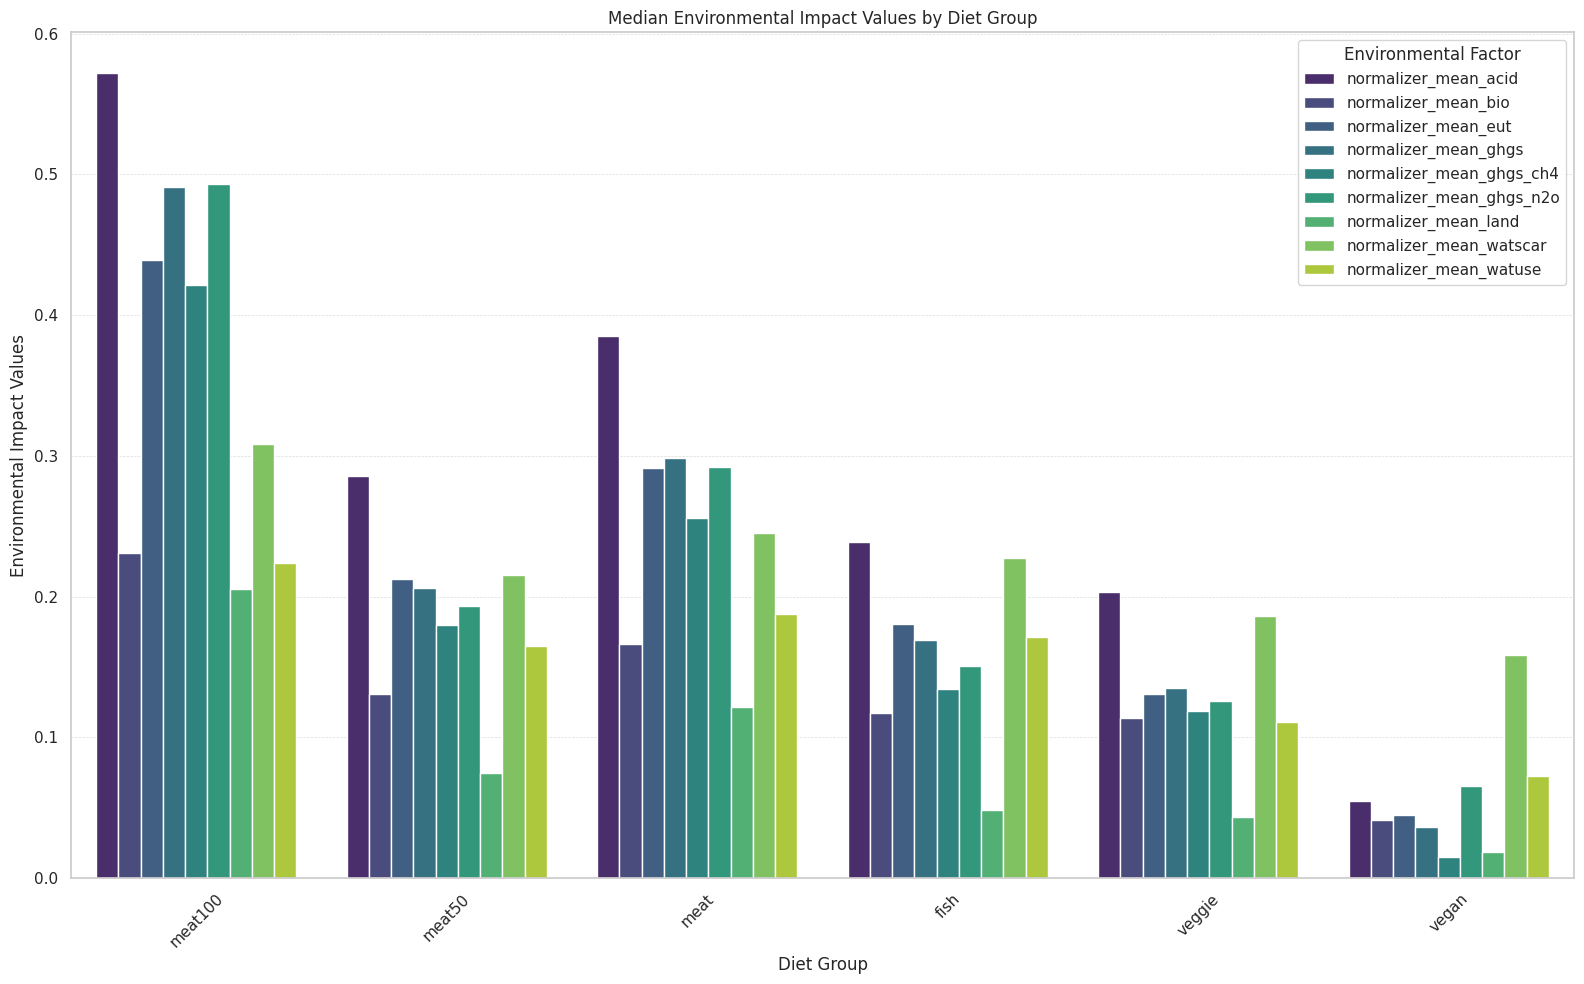

In [ ]:
# Define the custom order for the x-axis categories
custom_order = ['meat100', 'meat50', 'meat', 'fish', 'veggie', 'vegan']

features = [
    'normalizer_mean_ghgs',
    'normalizer_mean_land',
    'normalizer_mean_watscar',
    'normalizer_mean_eut',
    'normalizer_mean_ghgs_ch4',
    'normalizer_mean_ghgs_n2o',
    'normalizer_mean_bio',
    'normalizer_mean_watuse',
    'normalizer_mean_acid'
]

# Define the custom order for the x-axis categories
custom_order = ['meat100', 'meat50', 'meat', 'fish', 'veggie', 'vegan']

# Converting data from wide to long format for easier manipulation
melted_data = data.melt(id_vars='diet_group', value_vars=features, var_name='Environmental Factor', value_name='Value')

# Group by diet group and environmental factor to calculate the median
percentile_data = melted_data.groupby(['diet_group', 'Environmental Factor']).Value.agg(['median']).reset_index()

# Melt the aggregated data to long format for plotting
plot_data = percentile_data.melt(id_vars=['diet_group', 'Environmental Factor'], value_vars=['median'])


percentile_data['diet_group'] = pd.Categorical(percentile_data['diet_group'], categories=custom_order, ordered=True)
percentile_data = percentile_data.sort_values('diet_group')


plt.figure(figsize=(16, 10))
sns.barplot(x='diet_group', y='value', hue='Environmental Factor', data=plot_data[plot_data['variable'] == 'median'], palette="viridis", order=custom_order)
plt.title('Median Environmental Impact Values by Diet Group')
plt.xlabel('Diet Group')
plt.ylabel('Environmental Impact Values')
plt.xticks(rotation=45)
plt.legend(title='Environmental Factor')
plt.grid(True, which='major', axis='y', linestyle='--', linewidth=0.5, alpha=0.7)
plt.tight_layout()
plt.show()

The normalized data were observed from three dimensions of eating habits, age and gender. Data visualization using spider graphs

In [ ]:

# Ensure that feature columns are of numeric type
data[features] = data[features].apply(pd.to_numeric, errors='coerce')

group_columns = ['diet_group', 'sex', 'age_group']



# Function to create radar chart for a specific grouping column
def create_radar_chart(group_column):
    grouped_data = data.groupby(group_column)[features].mean().reset_index()

    fig = go.Figure()
    for _, row in grouped_data.iterrows():
        hover_info = f"<b>{group_column}: {row[group_column]}</b><br>"
        for feature in features:
            hover_info += f"{feature}: {row[feature]:.2f}<br>"

        fig.add_trace(go.Scatterpolar(
            r=row[features].tolist(),
            theta=features,
            fill='toself',
            name=f"{group_column}: {row[group_column]}",
            hovertemplate=hover_info
        ))

    fig.update_layout(
        polar=dict(
            radialaxis=dict(visible=True)
        ),
        showlegend=True,
        title=f'Environmental Impact by {group_column.capitalize()}',
        width=800,
        height=800
    )
    return fig

for group in group_columns:
    radar_chart = create_radar_chart(group)
    radar_chart.show()

The nine metrics are normalized, multiplied by appropriate weights, and added together into a new column called environmental_impact_level, which is then summarized by diet group

<ipython-input-22-effc7d65f849>:15: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




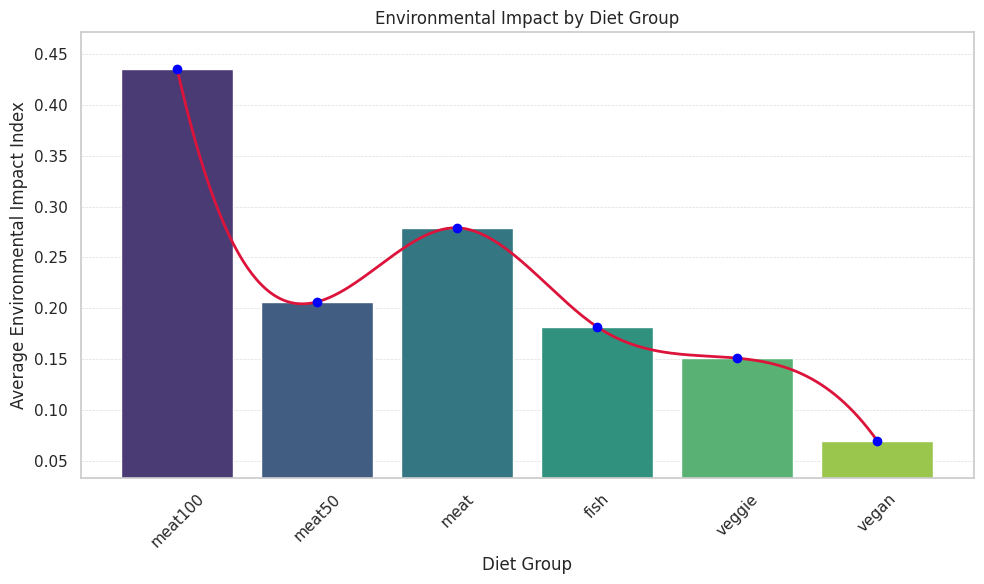

In [ ]:

import numpy as np


custom_order = ['meat100', 'meat50', 'meat', 'fish', 'veggie', 'vegan']

# Calculate each diet group's average environmental impact index, ordered by 'custom_order'
group_means = data.groupby('diet_group')['environmental_impact_level'].mean().reindex(custom_order).reset_index()

# Plotting the bar chart with aesthetics similar to the subplots
plt.figure(figsize=(10, 6))

# Create the bar plot
sns.barplot(data=group_means, x='diet_group', y='environmental_impact_level', order=custom_order, palette="viridis")

plt.grid(True, which='major', axis='y', linestyle='--', linewidth=0.5, alpha=0.7)


x = np.linspace(0, len(custom_order) - 1, 300)
y = group_means['environmental_impact_level']
spl = make_interp_spline(range(len(custom_order)), y, k=3)
y_smooth = spl(x)

plt.plot(x, y_smooth, color='crimson', linewidth=2)

plt.scatter(range(len(custom_order)), y, color='blue', zorder=5)

y_buffer = (y.max() - y.min()) * 0.1
plt.ylim(y.min() - y_buffer, y.max() + y_buffer)


plt.xlabel('Diet Group')
plt.ylabel('Average Environmental Impact Index')
plt.title('Environmental Impact by Diet Group')
plt.xticks(range(len(custom_order)), custom_order, rotation=45)

plt.tight_layout()
plt.show()


Explore the relationship (after normalization) between different dietary groups for different metrics

<ipython-input-23-c5e11e197d40>:11: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.


<ipython-input-23-c5e11e197d40>:11: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.


<ipython-input-23-c5e11e197d40>:11: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.


<ipython-input-23-c5e11e197d40>:11: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.


<ipython-input-23-c5e11e197d40>:11: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and wi

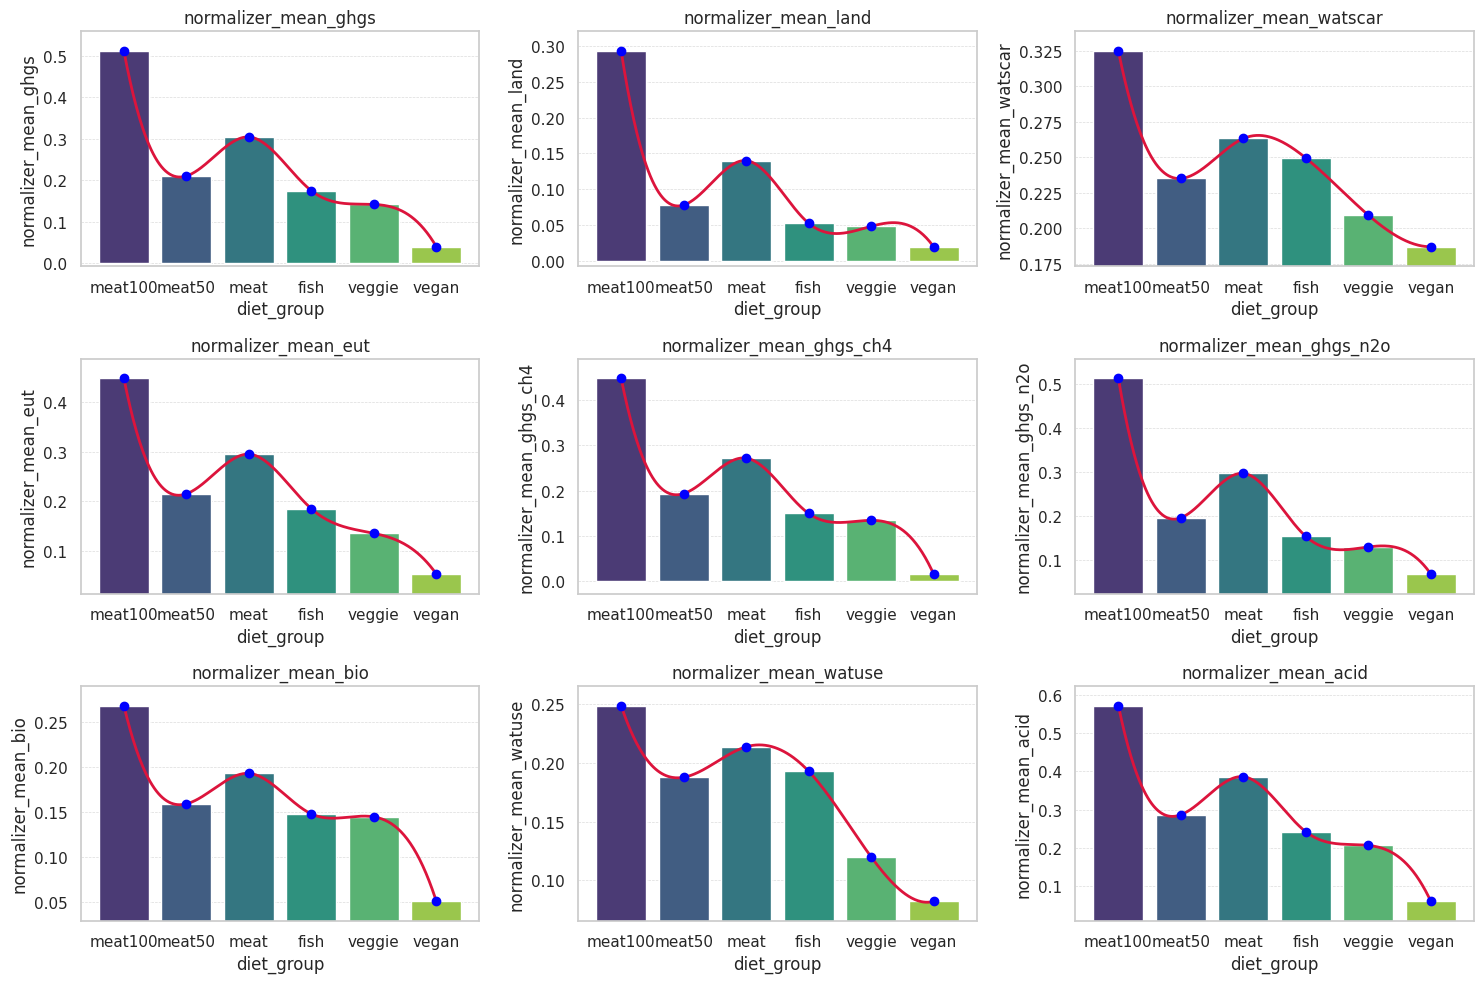

In [ ]:

# Define the custom order for the x-axis categories
custom_order = ['meat100', 'meat50', 'meat', 'fish', 'veggie', 'vegan']

# Set up the matplotlib figure (3x3 subplots for the 9 features)
fig, axes = plt.subplots(3, 3, figsize=(15, 10))
# Loop through features and create a bar plot for each
for i, feature in enumerate(features):
    ax = axes.flatten()[i]
    group_data = data.groupby('diet_group')[feature].mean().reindex(custom_order).reset_index()

    sns.barplot(data=group_data, x='diet_group', y=feature, ax=ax, order=custom_order, palette="viridis")
    ax.grid(True, which='major', axis='y', linestyle='--', linewidth=0.5, alpha=0.7)

    x_new = np.linspace(0, len(custom_order)-1, 300)
    spl = make_interp_spline(range(len(custom_order)), group_data[feature], k=3)
    y_smooth = spl(x_new)

    ax.plot(x_new, y_smooth, color='crimson', linewidth=2)
    ax.scatter(range(len(custom_order)), group_data[feature], color='blue', zorder=5)

    ax.set_title(feature)
    y_buffer = (group_data[feature].max() - group_data[feature].min()) * 0.1
    ax.set_ylim(group_data[feature].min() - y_buffer, group_data[feature].max() + y_buffer)

plt.tight_layout()
plt.show()

Finding outliers for each dimension of mean_

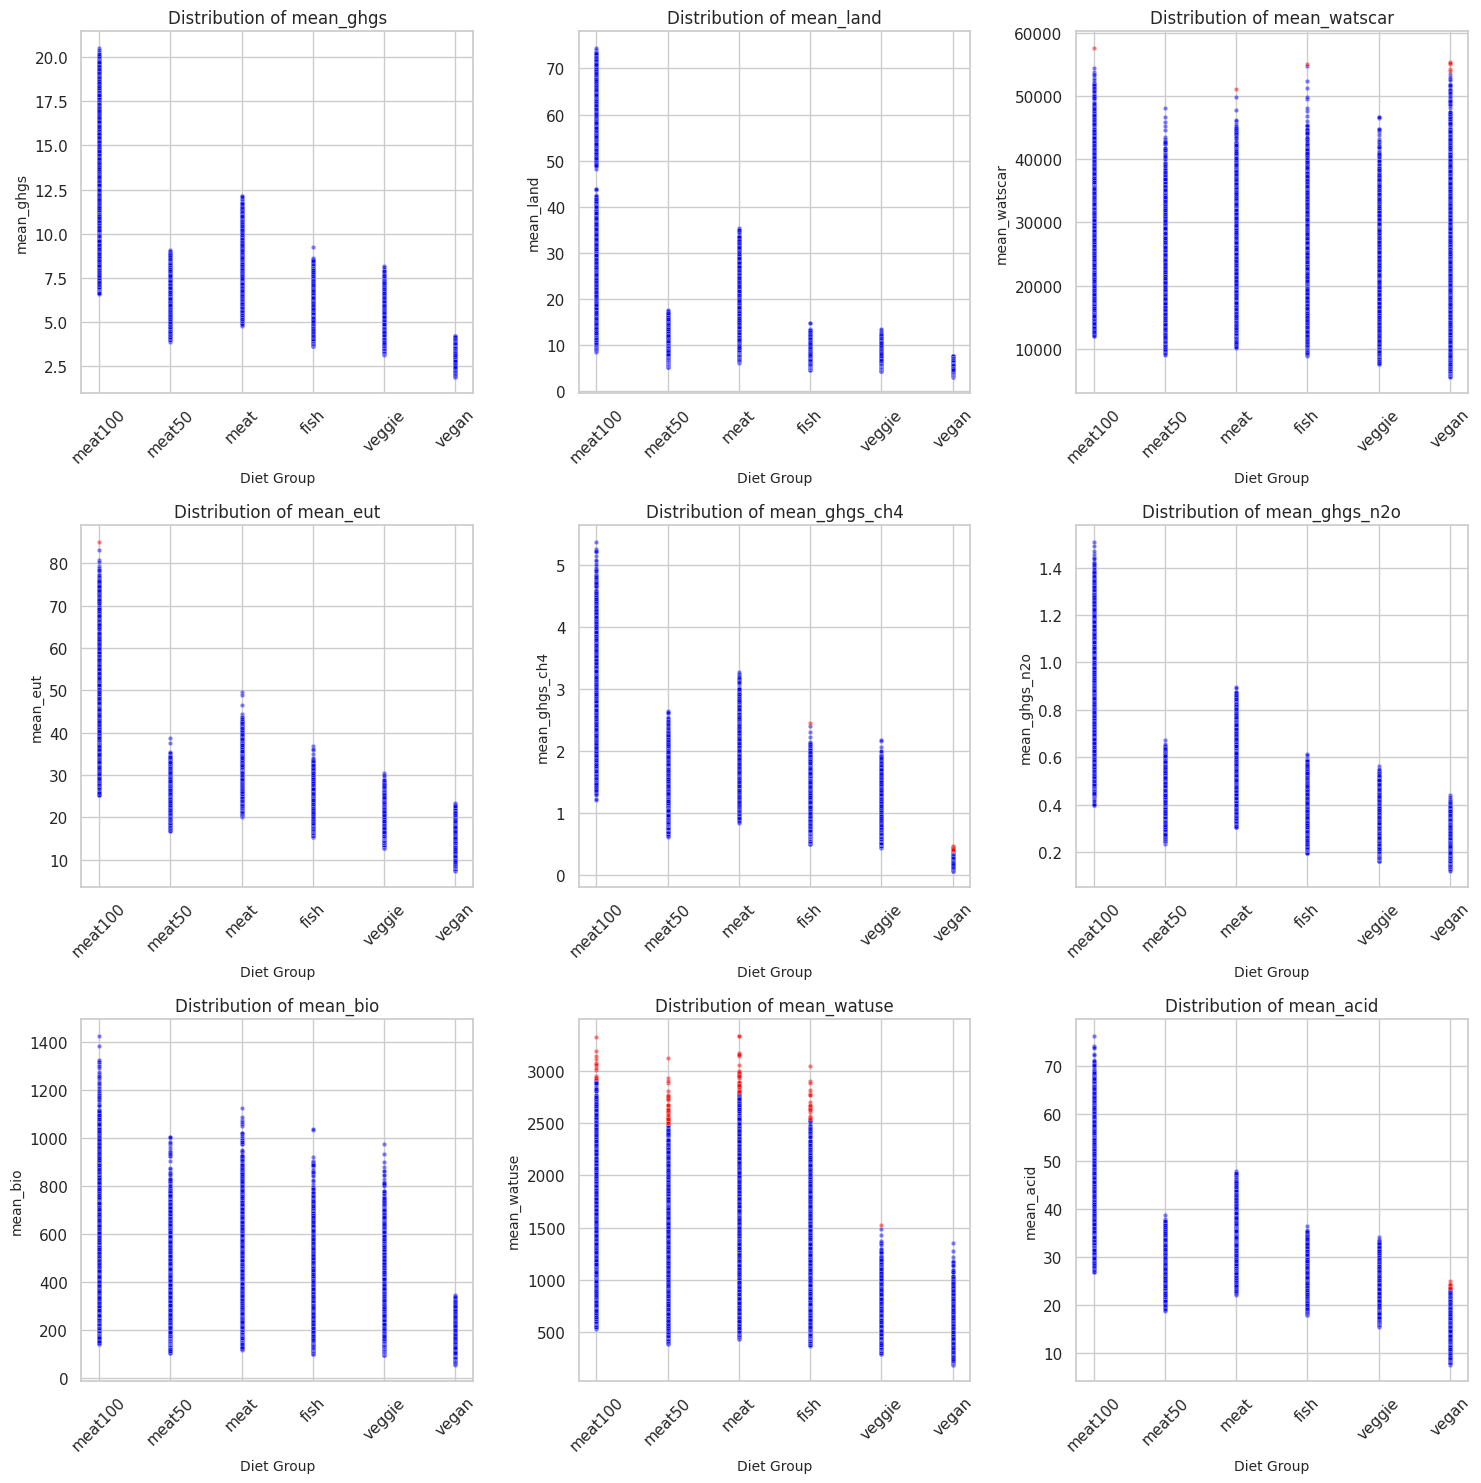

In [ ]:


# Filter for columns that start with 'mean_'
mean_columns = [col for col in data.columns if col.startswith('mean_')]

# Set the aesthetic style of the plots
sns.set(style="whitegrid")

# Create a figure with a 3x3 grid of subplots
fig, axes = plt.subplots(3, 3, figsize=(15, 15))
axes = axes.flatten()  # Flatten the 2D array of axes for easy iteration

# Function to calculate outliers
def find_outliers(series):
    q1 = series.quantile(0.05)
    q3 = series.quantile(0.95)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    return (series < lower_bound) | (series > upper_bound)

# Iterate over each mean column and assign a plot to a subplot
for i, mean_col in enumerate(mean_columns):
    axes[i].set_title(f'Distribution of {mean_col}', fontsize=12)

    for group in custom_order:
        group_data = data[data['diet_group'] == group]
        outliers = find_outliers(group_data[mean_col])


        sns.scatterplot(ax=axes[i], x=[group]*len(group_data[~outliers]), y=group_data[~outliers][mean_col],
                        color='blue', marker='o', s=10, alpha=0.5)

        sns.scatterplot(ax=axes[i], x=[group]*len(group_data[outliers]), y=group_data[outliers][mean_col],
                        color='red', marker='o', s=10, alpha=0.5)

        axes[i].set_xticks(range(len(custom_order)))
        axes[i].set_xticklabels(custom_order)
        axes[i].set_xlabel('Diet Group', fontsize=10)
        axes[i].set_ylabel(mean_col, fontsize=10)
        axes[i].tick_params(axis='x', rotation=45)


plt.tight_layout()
plt.show()

#3D scatter plot

Finally, a three-bit scatter plot is generated.The x-axis represents the diet group, and the y-axis represents the age group. z-axis represents Environmental Pollution Level.

In [ ]:
import pandas as pd
import numpy as np
import plotly.express as px
import plotly.graph_objects as go

# Assuming 'data' is loaded as shown in the commented-out code block

# Select numeric columns for processing
numeric_columns = data.select_dtypes(include=[np.number]).columns.tolist()

# Columns to be included in the grouping operation
columns_to_group = ['age_group', 'diet_group', 'sex', 'grouping']

# Grouping data and calculating median for numeric columns
grouped_data = data.groupby(columns_to_group)[numeric_columns].median().reset_index()

age_groups_order = ['20-29', '30-39', '40-49', '50-59', '60-69', '70-79']
diet_groups_order = ['meat100', 'meat50', 'meat', 'fish', 'veggie', 'vegan']

grouped_data['age_group'] = pd.Categorical(grouped_data['age_group'], categories=age_groups_order, ordered=True)
grouped_data['diet_group'] = pd.Categorical(grouped_data['diet_group'], categories=diet_groups_order, ordered=True)


grouped_data['age_group_codes'] = grouped_data['age_group'].cat.codes
grouped_data['diet_group_codes'] = grouped_data['diet_group'].cat.codes

hover_data = {
    'mean_ghgs': ':.2f',
    'mean_land': ':.2f',
    'mean_watscar': ':.2f',
    'mean_eut': ':.2f',
    'mean_ghgs_ch4': ':.2f',
    'mean_ghgs_n2o': ':.2f',
    'mean_bio': ':.2f',
    'mean_watuse': ':.2f',
    'mean_acid': ':.2f'
}

hover_data.update({'grouping': True, 'age_group': True, 'diet_group': True, 'sex': True})

fig = px.scatter_3d(
    grouped_data,
    x='age_group_codes',
    y='diet_group_codes',
    z='environmental_impact_level',
    color='sex',
    color_discrete_map={'male': 'red', 'female': 'blue'},
    labels={
        'age_group_codes': 'Age Group',
        'diet_group_codes': 'Diet Group',
        'environmental_impact_level': 'Median Environmental Impact Index',
        'sex': 'Sex',
        'grouping': 'Grouping'
    },
    title='3D Scatter Plot of Median Environmental Impact Index by Age Group, Diet Group, and Sex',
    hover_data=hover_data
)


fig.update_layout(
    width=1000,
    height=1000,
    margin=dict(l=10, r=10, b=10, t=50),
    title=dict(x=0.5, y=0.95),
    scene=dict(
        xaxis=dict(ticktext=age_groups_order, tickvals=list(range(len(age_groups_order)))),
        yaxis=dict(ticktext=diet_groups_order, tickvals=list(range(len(diet_groups_order)))),
        zaxis=dict(title='Environmental Impact Index')
    )
)

fig.show()



#Treemap create by tableau


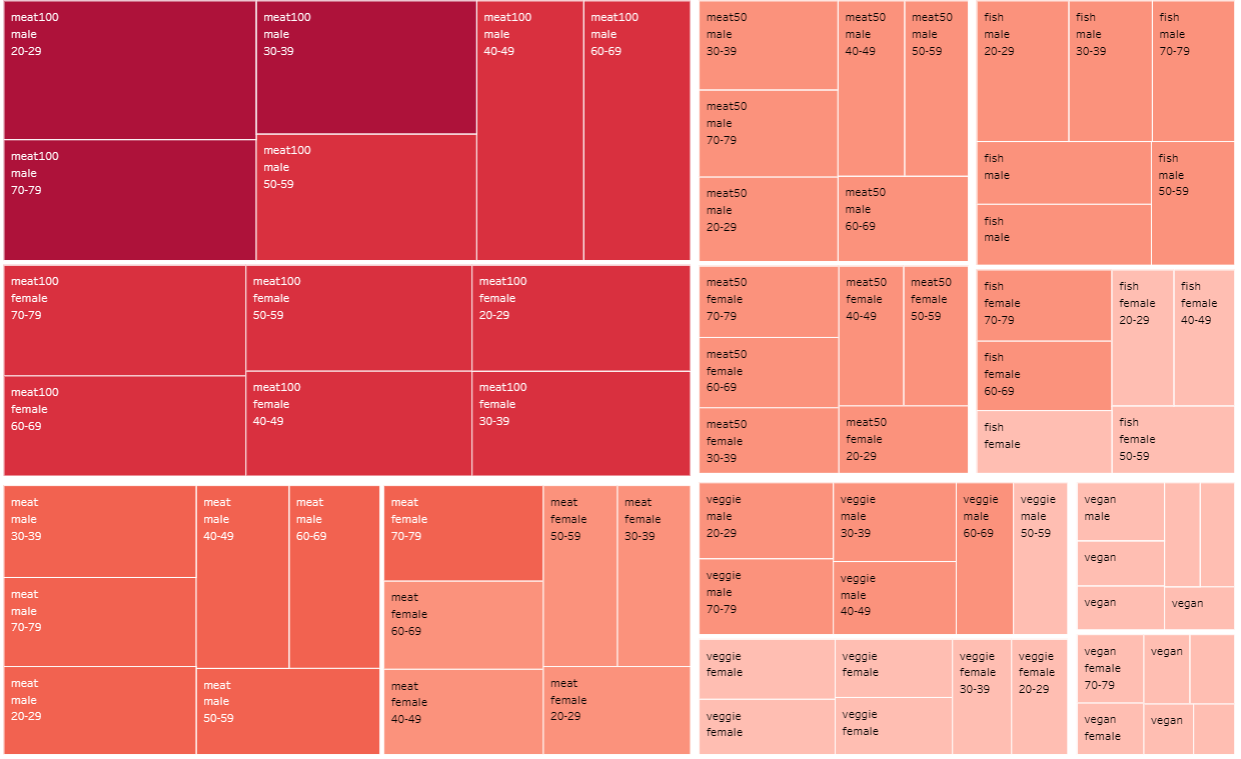